In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor, rdMolDescriptors
import time
rdDepictor.SetPreferCoordGen(True)
import rdkit
%pylab inline
print(rdkit.__version__)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
2023.03.3


In [3]:
#lets load all mdfps from the database
import psycopg2
hostname = 'lebanon'
dbname = 'cs_mdfps'
username = 'cschiebroek'

cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()

# get all the mdfps from cs_mdfps_schema.mdfp_experiment_data
sql_query = '''
SELECT mdfp FROM cs_mdfps_schema.mdfp_experiment_data;
'''

# Execute the SQL query
cur.execute(sql_query)
results = cur.fetchall()
print(f'{len(results)} results fetched')

16982 results fetched


In [11]:
import json
mdfps = [json.loads(r[0]['mdfp']) for r in results]

In [25]:
mdfps

[[9,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7.361432252633201,
  0.2837151924402524,
  7.34042141946558,
  14.033742219875462,
  5.018821051018752,
  13.296541873715412,
  3.0175857863467783,
  4.353506155897645,
  3.780431651235485,
  -52.02286927297752,
  7.64448526452626,
  -52.45103811827988,
  21.39517447250866,
  4.952106406604119,
  20.619064966261192,
  -49.00528348663075,
  8.735995589648539,
  -49.230908851076755,
  0.2920177211844079,
  0.017855504243481337,
  0.2924185563222354,
  3.8179197,
  0.071479075,
  3.8226213],
 [13,
  1,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  -97.79877700710925,
  3.1203280993191704,
  -97.81470584128184,
  50.24423152306107,
  3.0954263056754407,
  49.99760833257736,
  -256.15538212307536,
  22.789790314416294,
  -256.4998335257012,
  -5.812085025768307,
  10.869523034972403,
  -5.824972538654432,
  -47.554545484048184,
  4.672215709846032,
  -47.787253514146954,
  -261.96746714884364,
  19.844531570016784,
  -262.68313275060507,
  0.2

In [26]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mdfps)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.98928708 0.00742047]
[138094.36341406  11959.9810173 ]


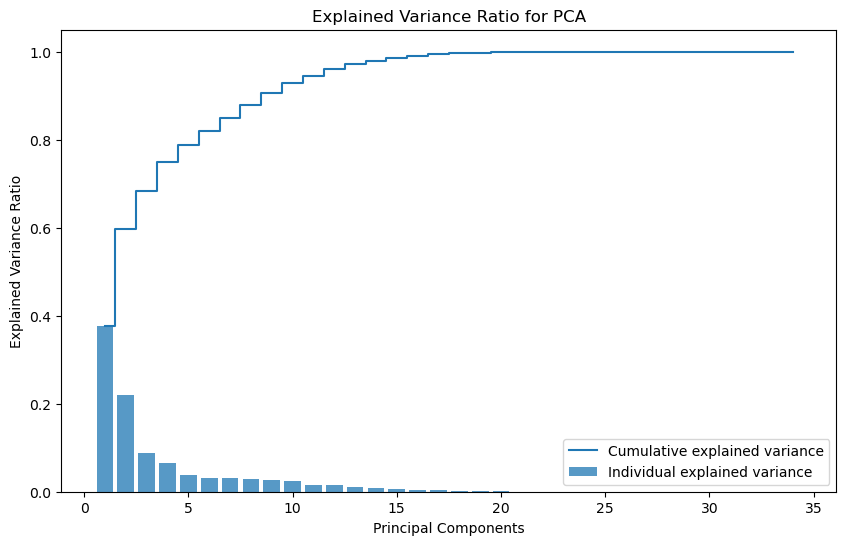

Explained Variance Ratio for each Principal Component:
PC1: 0.3762
PC2: 0.2206
PC3: 0.0875
PC4: 0.0661
PC5: 0.0385
PC6: 0.0308
PC7: 0.0305
PC8: 0.0292
PC9: 0.0262
PC10: 0.0241
PC11: 0.0162
PC12: 0.0145
PC13: 0.0112
PC14: 0.0080
PC15: 0.0070
PC16: 0.0048
PC17: 0.0035
PC18: 0.0023
PC19: 0.0009
PC20: 0.0008
PC21: 0.0004
PC22: 0.0003
PC23: 0.0003
PC24: 0.0001
PC25: 0.0000
PC26: 0.0000
PC27: 0.0000
PC28: 0.0000
PC29: 0.0000
PC30: 0.0000
PC31: 0.0000
PC32: 0.0000
PC33: 0.0000
PC34: 0.0000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load example data (you can replace this with your own dataset)
X = mdfps
# Standardize the features (optional but recommended for PCA)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Create a PCA instance and fit the data
pca = PCA()
pca.fit(X_std)

# Transform the data to the principal components
X_pca = pca.transform(X_std)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA')
plt.legend()
plt.show()

# Print out the explained variance for each principal component
print("Explained Variance Ratio for each Principal Component:")
for i, variance_ratio in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {variance_ratio:.4f}")


NumHeavyAtoms: mean=13.17, std=6.83
NumRotatableBonds: mean=3.74, std=4.38
NumN: mean=0.59, std=1.08
NumO: mean=1.54, std=1.62
NumF: mean=0.18, std=1.08
NumP: mean=0.05, std=0.23
NumS: mean=0.13, std=0.43
NumCl: mean=0.54, std=1.36
NumBr: mean=0.10, std=0.60
NumI: mean=0.01, std=0.11
water_intra_crf_mean: mean=-123.20, std=357.92
water_intra_crf_std: mean=3.67, std=4.65
water_intra_crf_median: mean=-123.27, std=357.93
water_intra_lj_mean: mean=32.66, std=27.23
water_intra_lj_std: mean=5.58, std=3.03
water_intra_lj_median: mean=32.16, std=27.21
water_total_crf_mean: mean=-200.36, std=395.47
water_total_crf_std: mean=15.42, std=9.31
water_total_crf_median: mean=-200.21, std=395.40
water_total_lj_mean: mean=-40.89, std=23.85
water_total_lj_std: mean=10.56, std=3.26
water_total_lj_median: mean=-41.58, std=23.80
water_intra_ene_mean: mean=-90.54, std=354.14
water_intra_ene_std: mean=6.89, std=4.41
water_intra_ene_median: mean=-90.98, std=354.10
water_total_ene_mean: mean=-241.24, std=395.32

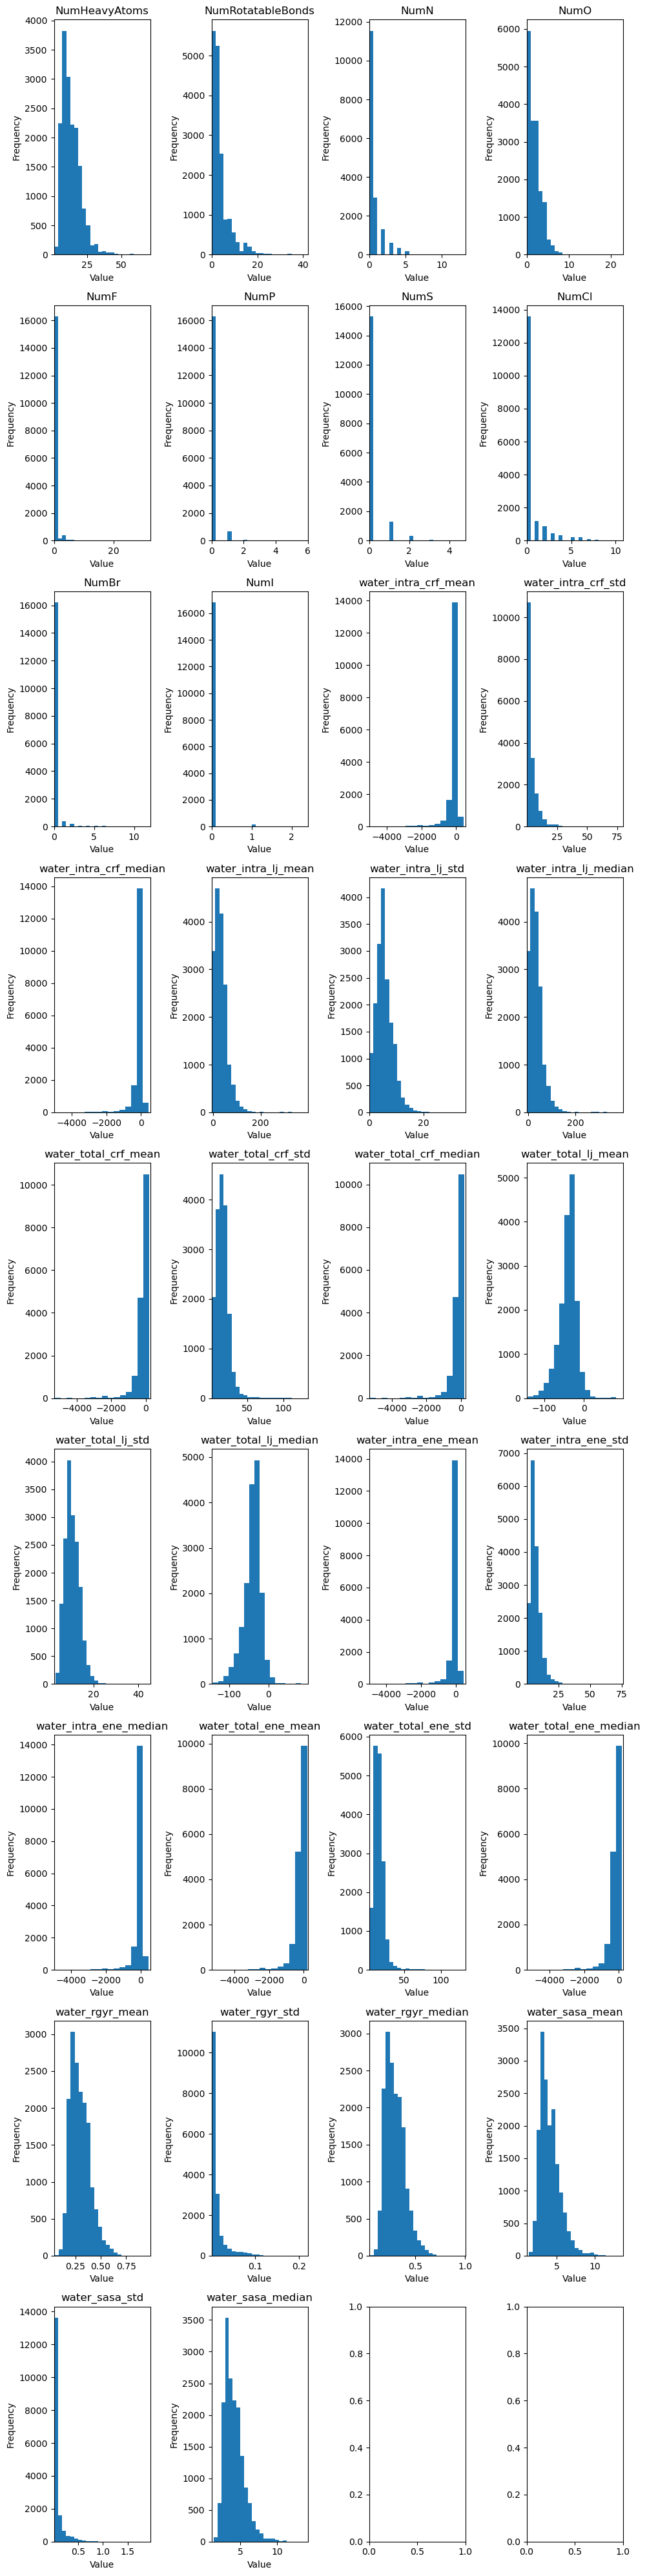

In [57]:
#for each feature, make a list and make a histogram. subplots for each feature
#first normalize the data
# mdfps_norm = (mdfps - np.mean(mdfps, axis=0)) / np.std(mdfps, axis=0)
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI', 'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
n_features = len(mdfps[0])
n_bins = 20
fig, axs = plt.subplots(int(n_features/4)+1, 4, figsize=(10, 40))
for i in range(n_features):
    feature_vals = [mdfps[j][i] for j in range(len(mdfps))]
    axs[int(i/4), i%4].hist(feature_vals, bins=n_bins)
    axs[int(i/4), i%4].set_title(mdfp_features_all[i])
    axs[int(i/4), i%4].set_xlabel('Value')
    axs[int(i/4), i%4].set_ylabel('Frequency')
    max = np.max(feature_vals) + 0.2*np.max(feature_vals)
    min = np.min(feature_vals) - 0.2*np.min(feature_vals)
    axs[int(i/4), i%4].set_xlim([min, max])
    #print out feature name and mean and std of the non-normalized data
    print(f'{mdfp_features_all[i]}: mean={np.mean(feature_vals):.2f}, std={np.std(feature_vals):.2f}')
plt.tight_layout()
plt.show()



NumHeavyAtoms: mean=-0.00, std=1.00
NumRotatableBonds: mean=0.00, std=1.00
NumN: mean=-0.00, std=1.00
NumO: mean=-0.00, std=1.00
NumF: mean=-0.00, std=1.00
NumP: mean=-0.00, std=1.00
NumS: mean=-0.00, std=1.00
NumCl: mean=-0.00, std=1.00
NumBr: mean=-0.00, std=1.00
NumI: mean=0.00, std=1.00
water_intra_crf_mean: mean=-0.00, std=1.00
water_intra_crf_std: mean=-0.00, std=1.00
water_intra_crf_median: mean=0.00, std=1.00
water_intra_lj_mean: mean=0.00, std=1.00
water_intra_lj_std: mean=0.00, std=1.00
water_intra_lj_median: mean=0.00, std=1.00
water_total_crf_mean: mean=0.00, std=1.00
water_total_crf_std: mean=-0.00, std=1.00
water_total_crf_median: mean=0.00, std=1.00
water_total_lj_mean: mean=0.00, std=1.00
water_total_lj_std: mean=0.00, std=1.00
water_total_lj_median: mean=0.00, std=1.00
water_intra_ene_mean: mean=-0.00, std=1.00
water_intra_ene_std: mean=-0.00, std=1.00
water_intra_ene_median: mean=-0.00, std=1.00
water_total_ene_mean: mean=0.00, std=1.00
water_total_ene_std: mean=-0.00

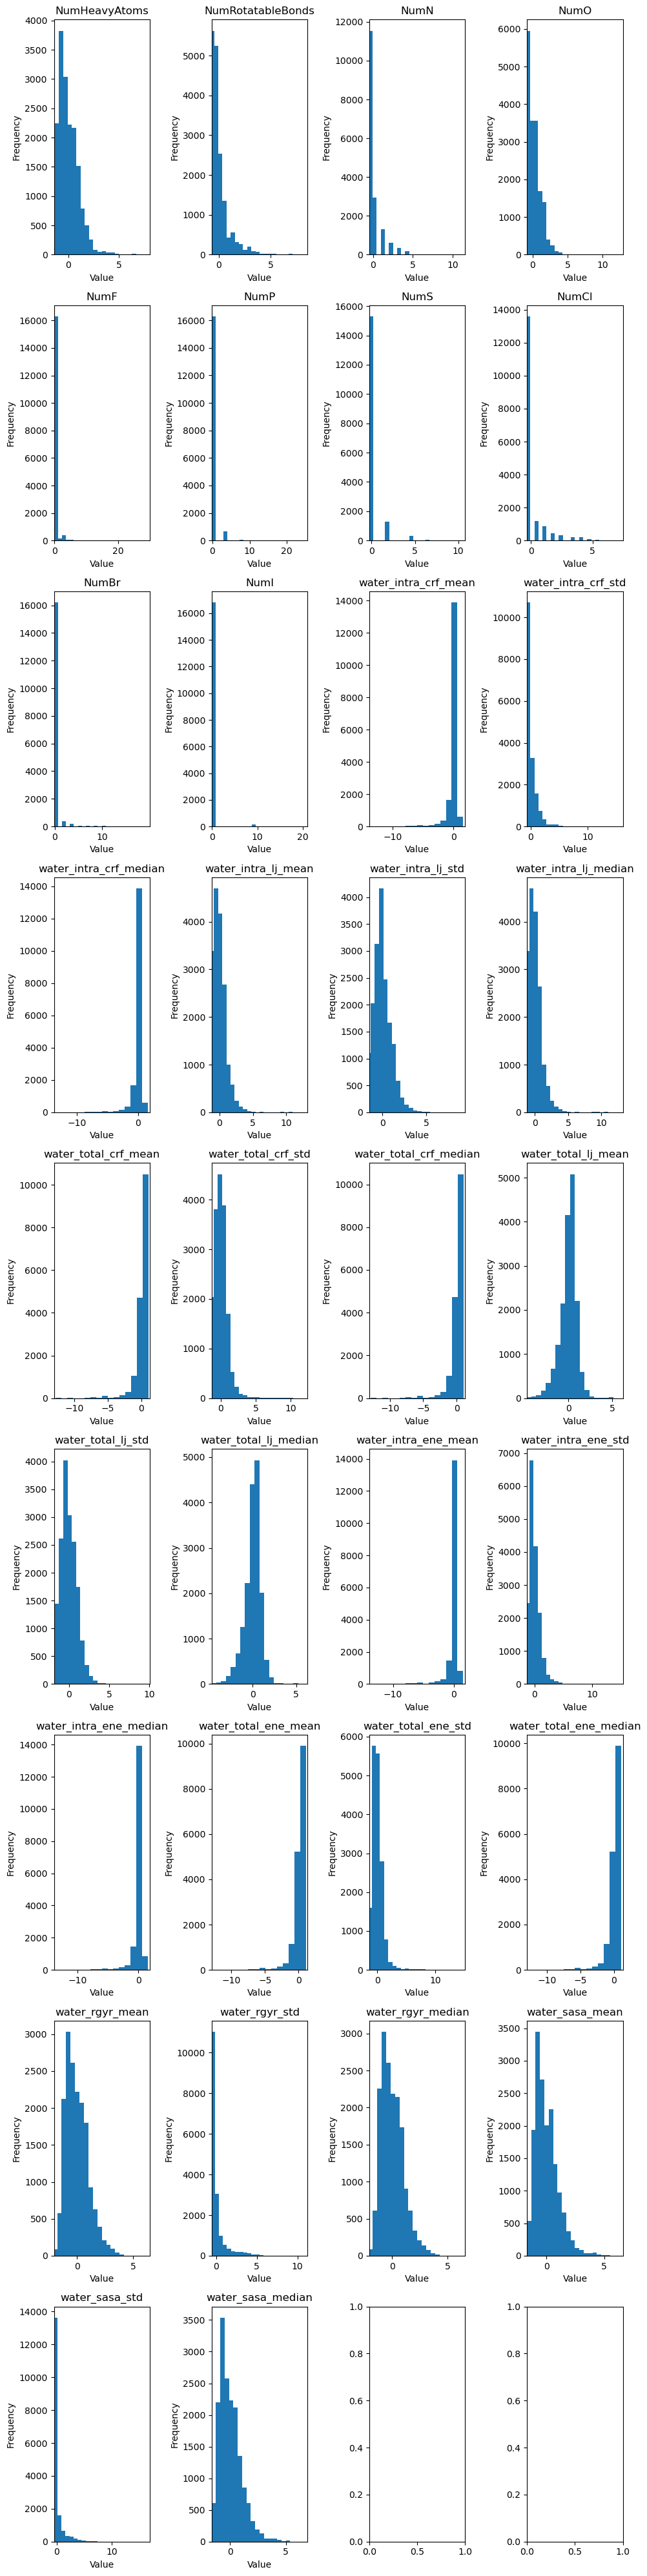

In [58]:
#for each feature, make a list and make a histogram. subplots for each feature
#first normalize the data
# mdfps_norm = (mdfps - np.mean(mdfps, axis=0)) / np.std(mdfps, axis=0)
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI', 'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
n_features = len(mdfps[0])
n_bins = 20
fig, axs = plt.subplots(int(n_features/4)+1, 4, figsize=(10, 40))
for i in range(n_features):
    feature_vals = [mdfps[j][i] for j in range(len(mdfps))]
    #normalize the data
    feature_vals = (feature_vals - np.mean(feature_vals)) / np.std(feature_vals)
    axs[int(i/4), i%4].hist(feature_vals, bins=n_bins)
    axs[int(i/4), i%4].set_title(mdfp_features_all[i])
    axs[int(i/4), i%4].set_xlabel('Value')
    axs[int(i/4), i%4].set_ylabel('Frequency')
    max = np.max(feature_vals) + 0.2*np.max(feature_vals)
    min = np.min(feature_vals) - 0.2*np.min(feature_vals)
    axs[int(i/4), i%4].set_xlim([min, max])
    #print out feature name and mean and std of the non-normalized data
    print(f'{mdfp_features_all[i]}: mean={np.mean(feature_vals):.2f}, std={np.std(feature_vals):.2f}')
plt.tight_layout()
plt.show()

